# Projet 5 : Maintenance

## Objectifs :

Définir le délai pour réaliser la mise à jour du modèle de machine learning choisis afin de s'assurer que le clustering reste pertinent.

## Résultats

Mise à jour au bout de :

*   50 jours pour l'ensemble des variables.
*   50 jours pour les variables RFM et les avis moyens.
*   50 jours pour les variables RFM.






## Import des variables et des librairies

Objectif : importer l'ensemble des éléments nécessaires à l'exécution du code.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import datetime

In [8]:
rfm_df = pd.read_csv("D:/OpenClassroom/Projet_5/RFM_data.csv")

## Définition de la fonction de maintenance

Objectif : créer une fonction qui va simuler l'ajout de données au fur et à mesure des périodes pour être en mesure de proposer un délai pour le réentrainement du modèle de machine learning.

In [9]:
def analyze_rfm_ari(data, columns_of_interest, date_column, scaling_columns, months_interval=9, interval_days=10, n_clusters=4, random_state=42, ari_threshold=0.8):
    """
    Analyse l'évolution de l'ARI (Adjusted Rand Index) pour déterminer le temps idéal entre les mises à jour du modèle.

    Parameters:
    - data (pd.DataFrame): Le DataFrame contenant les données.
    - columns_of_interest (list): Liste des colonnes à utiliser dans l'analyse.
    - date_column (str): Le nom de la colonne de date.
    - scaling_columns (list): Liste des colonnes à utiliser pour la standardisation.
    - months_interval (int): Période initiale en mois pour l'entraînement du modèle de base.
    - interval_days (int): Intervalle de jours pour la simulation des périodes.
    - n_clusters (int): Nombre de clusters pour le modèle KMeans.
    - random_state (int): État aléatoire pour la reproductibilité des résultats (default=42).
    - ari_threshold (float): Seuil ARI pour déterminer la mise à jour du modèle.
    """

    # Copie des données et converssion de date en datetime
    ari_data = data[columns_of_interest].copy()
    ari_data[date_column] = pd.to_datetime(ari_data[date_column])

    # Définition de la date de début et de la date initiale
    start_date = ari_data[date_column].min()
    initial_end_date = start_date + pd.DateOffset(months=months_interval)

    # Entraînement du modèle initial
    F0 = ari_data[(ari_data[date_column] >= start_date) & (ari_data[date_column] <= initial_end_date)]
    scaler_M0 = StandardScaler().fit(F0[scaling_columns])
    F0_scaled = scaler_M0.transform(F0[scaling_columns])
    M0 = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state).fit(F0_scaled)

    # Simulation des périodes
    current_date = initial_end_date
    end_date = ari_data[date_column].max()
    ari_scores = []
    dates = []
    period_maj = 0

    while current_date <= end_date:
        print(start_date)
        # Génération de Fi à partir de la date courante
        Fi = ari_data[(ari_data[date_column] >= start_date) & (ari_data[date_column] <= current_date)]

        # Standardisation avec le scaler du modèle initial
        Fi_scaled_M0 = scaler_M0.transform(Fi[scaling_columns])

        # Prédictions avec le modèle initial
        C1_init = M0.predict(Fi_scaled_M0)

        # Entraînement d'un nouveau modèle et prédictions
        scaler_M1 = StandardScaler().fit(Fi[scaling_columns])
        Fi_scaled_M1 = scaler_M1.transform(Fi[scaling_columns])
        M1 = KMeans(n_clusters=n_clusters, random_state=random_state).fit(Fi_scaled_M1)
        C1_new = M1.labels_

        # Calcul de l'ARI
        ari = adjusted_rand_score(C1_init, C1_new)
        ari_scores.append(ari)
        dates.append(current_date)

        # Passage à la période suivante et vérification du score
        current_date += datetime.timedelta(days=interval_days)
        if ari > ari_threshold:
            period_maj += interval_days

    # Évolution de l'ARI
    plt.plot(dates, ari_scores, marker='o')
    plt.axhline(y=ari_threshold, color='r', linestyle='--')
    plt.title("Évolution de l'ARI au fil du temps")
    plt.xlabel('Date')
    plt.ylabel('ARI')
    plt.xticks(rotation=45)
    plt.show()

    # Déterminer la période de mise à jour
    print(f'Le temps avant de devoir faire une mise à jour est de : {period_maj} jours')

## ARI

Objectif : executer la fonction "analyze_rfm_ari" sur différentes configurations (ensemble des variables, rfm et review score, uniquement rfm).

### Utilisation sur l'ensemble des variables

2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


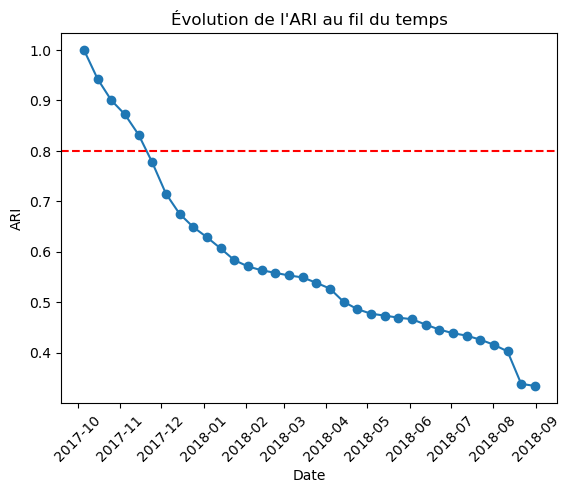

Le temps avant de devoir faire une mise à jour est de : 50 jours


In [10]:
# Utilisation de la fonction et choix des variables
data = rfm_df
columns_of_interest = ['customer_id', 'recency', 'monetary', 'frequency',
                       'delay', 'average_review_score', 'date']
date_column = 'date'
scaling_columns = ['recency', 'monetary', 'frequency', 'delay',
                   'average_review_score']

analyze_rfm_ari(data, columns_of_interest, date_column, scaling_columns)

### Utilisation sur les variables RFM et sur les notes moyennes des avis

2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


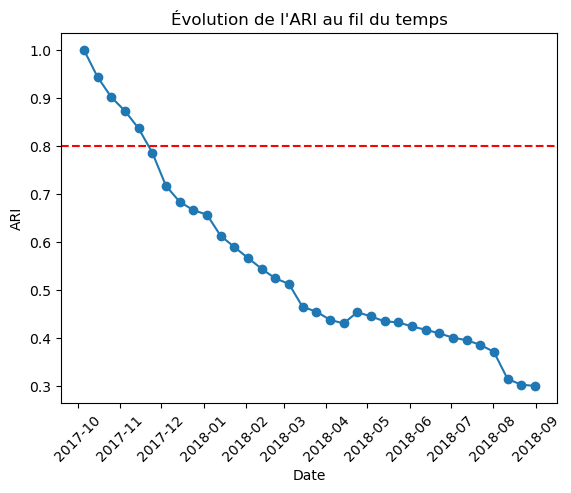

Le temps avant de devoir faire une mise à jour est de : 50 jours


In [11]:
# Utilisation de la fonction et choix des variables
data = rfm_df
columns_of_interest = ['customer_id', 'recency', 'monetary', 'frequency',
                       'average_review_score', 'date']
date_column = 'date'
scaling_columns = ['recency', 'monetary', 'frequency', 'average_review_score']

analyze_rfm_ari(data, columns_of_interest, date_column, scaling_columns)

### Utilisation sur les variables RFM

2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2017-01-05 11:56:06


C:\Users\6equal\anaconda3\envs\p5\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


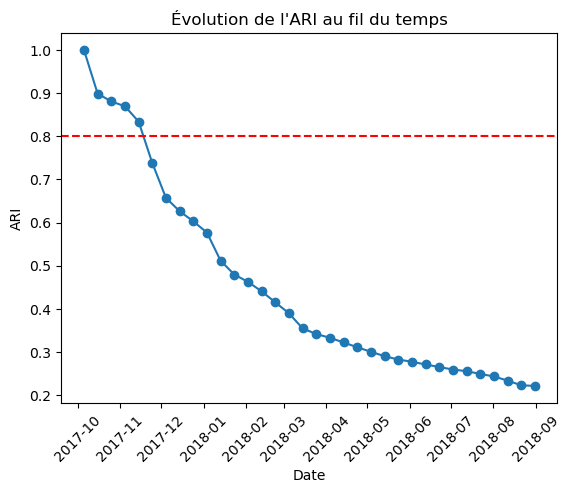

Le temps avant de devoir faire une mise à jour est de : 50 jours


In [12]:
# Utilisation de la fonction et choix des variables
data = rfm_df
columns_of_interest = ['customer_id', 'recency', 'monetary', 'frequency',
                       'date']
date_column = 'date'
scaling_columns = ['recency', 'monetary', 'frequency']

analyze_rfm_ari(data, columns_of_interest, date_column, scaling_columns)